# Постановка задачи:

0. Описать задачу 
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор ближайших соседей или другой метод
8. Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра. Сделать выводы
9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы

## 0. Описание задачи
Страховая компания хочет устанавливать конкурентоспособные цены на свое автострахование, что означает наличие хорошей модели для клиентов, рискующих попасть в аварию. Необходимо использовать данные о клиенте для прогнозирования вероятности предъявления претензии на страховые выплаты в следующем году. 

База данных: https://www.kaggle.com/datasets/racholsan/customer-data/

Поставлена задача бинарной классификации

In [1]:
import numpy as np              
import pandas as pd            
import matplotlib.pyplot as plt 
import seaborn as sns           
import sklearn

## 1. Чтение данных

In [2]:
data = pd.read_csv('C:/Users/Angela/OneDrive/Рабочий стол/customer-data.csv')
data

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,False,10238,16000.0,sedan,0,0,1,False
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,True,32765,NaN,sedan,1,0,0,False
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,True,10238,14000.0,sedan,0,0,0,False
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,True,10238,13000.0,sedan,2,0,1,True


### Имеем 19 признаков

1. ID - уникальный номер
2. Age - возраст клиента
3. Gender - пол клиента
4. Race - принадлежность к группе 
5. Driving_experience - водительский стаж
6. Education - образование
7. Income - уровень дохода
8. Credit_score - оценка платежеспособности/рейтинг доверия клиенту 
9. Vehicle_ownership - владение транспортным средством
10. Vehicle_year - год выпуска автомобиля
11. Married - семейный статус
12. Children - наличие детей
13. Postal_code - почтовый индекс
14. Annual_mileage - годовой пробег авто
15. Vehicle_type - тип автомобиля
16. Speeding_violations - число нарушений правил превышения скорости
17. DUIs - число штрафов за вождение в нетрезвом состоянии
18. Past_accidents - кол-во инцидентов в прошлом
19. Outcome - обратился ли клиент за страховыми выплатами

In [3]:
data.dtypes

id                       int64
age                     object
gender                  object
race                    object
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership         bool
vehicle_year            object
married                   bool
children                  bool
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
DUIs                     int64
past_accidents           int64
outcome                   bool
dtype: object

In [4]:
#Заменим True=1 and False=0
for i in data:
    if data[i].dtype=='bool':
        data[i]=data[i].map({True:1,False:0})
        
data.dtypes       

id                       int64
age                     object
gender                  object
race                    object
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership        int64
vehicle_year            object
married                  int64
children                 int64
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
DUIs                     int64
past_accidents           int64
outcome                  int64
dtype: object

Заменим тип "Object "на специальный, предназначенный для хранения категориальных значений

In [5]:
data["age"] = data["age"].astype('category')
data["gender"] = data["gender"].astype('category')
data["race"] = data["race"].astype('category')
data["driving_experience"] = data["driving_experience"].astype('category')
data["education"] = data["education"].astype('category')
data["income"] = data["income"].astype('category')
data["vehicle_year"] = data["vehicle_year"].astype('category')
data["vehicle_type"] = data["vehicle_type"].astype('category')


In [6]:
data["age"].dtype,data["gender"].dtype,data["race"].dtype, data["driving_experience"].dtype, data["education"].dtype, data["income"].dtype, data["vehicle_year"].dtype, data["vehicle_type"].dtype 

(CategoricalDtype(categories=['16-25', '26-39', '40-64', '65+'], ordered=False),
 CategoricalDtype(categories=['female', 'male'], ordered=False),
 CategoricalDtype(categories=['majority', 'minority'], ordered=False),
 CategoricalDtype(categories=['0-9y', '10-19y', '20-29y', '30y+'], ordered=False),
 CategoricalDtype(categories=['high school', 'none', 'university'], ordered=False),
 CategoricalDtype(categories=['middle class', 'poverty', 'upper class', 'working class'], ordered=False),
 CategoricalDtype(categories=['after 2015', 'before 2015'], ordered=False),
 CategoricalDtype(categories=['sedan', 'sports car'], ordered=False))

## 2. Визуализация данных

Получим визуализацию данных, вычислим основные характеристики (средние значения, стандартное отклонение, минимальное и максимальное значения, медиану)

In [7]:
desc = data.describe()
desc

,id,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents,outcome
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Можно заметить, что средний рейтинг доверия клиенту не превышает 0.6. Максимальное число превышений скорости 22, а максимальное число штрафов за вождение в нетрезвом виде равно 6.

In [8]:
desc2=data.describe(include=['category'])
desc2

,age,gender,race,driving_experience,education,income,vehicle_year,vehicle_type
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


Большинство клиентов имеют тип автомобиля sedan, 3.5 тысяч клиентов имеют стаж от 0 до 9 лет, почти у 7 тысяч клиентов год выпска автомобиля до 2015

Для количественных и бинарных признаков построим матрицу корреляции:

In [9]:
data_corr = data.corr()
data_corr

,id,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents,outcome
id,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
credit_score,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
vehicle_ownership,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
married,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
children,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
postal_code,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
annual_mileage,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
speeding_violations,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIs,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
past_accidents,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


<Axes: >

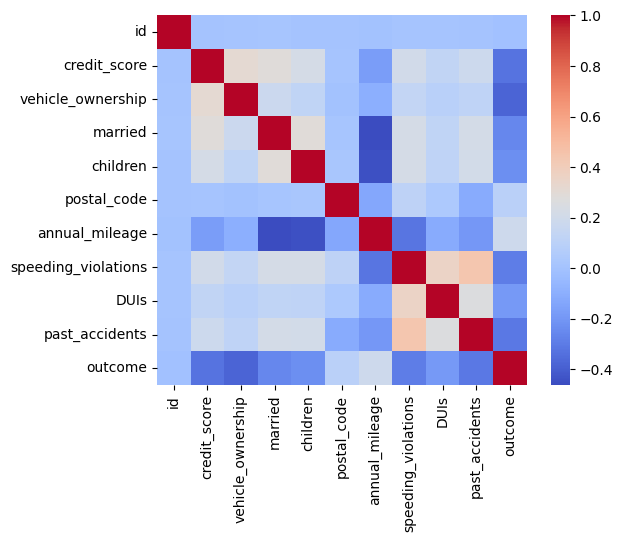

In [10]:
sns.heatmap(data_corr, square=True, cmap='coolwarm')

Числовые признаки несильно  коррелируют друг с другом, но зависимость есть у признаков DUIS, PAST_ACCIDENTS и SPEEDING_VIOLATIONS, так как они отвечают за число штрафов у клиента. Отрицательная корреляция у credit_score и outcome говорит о том, что чем больше клиент обращается за страховкой, тем ниже у него рейтинг доверия.

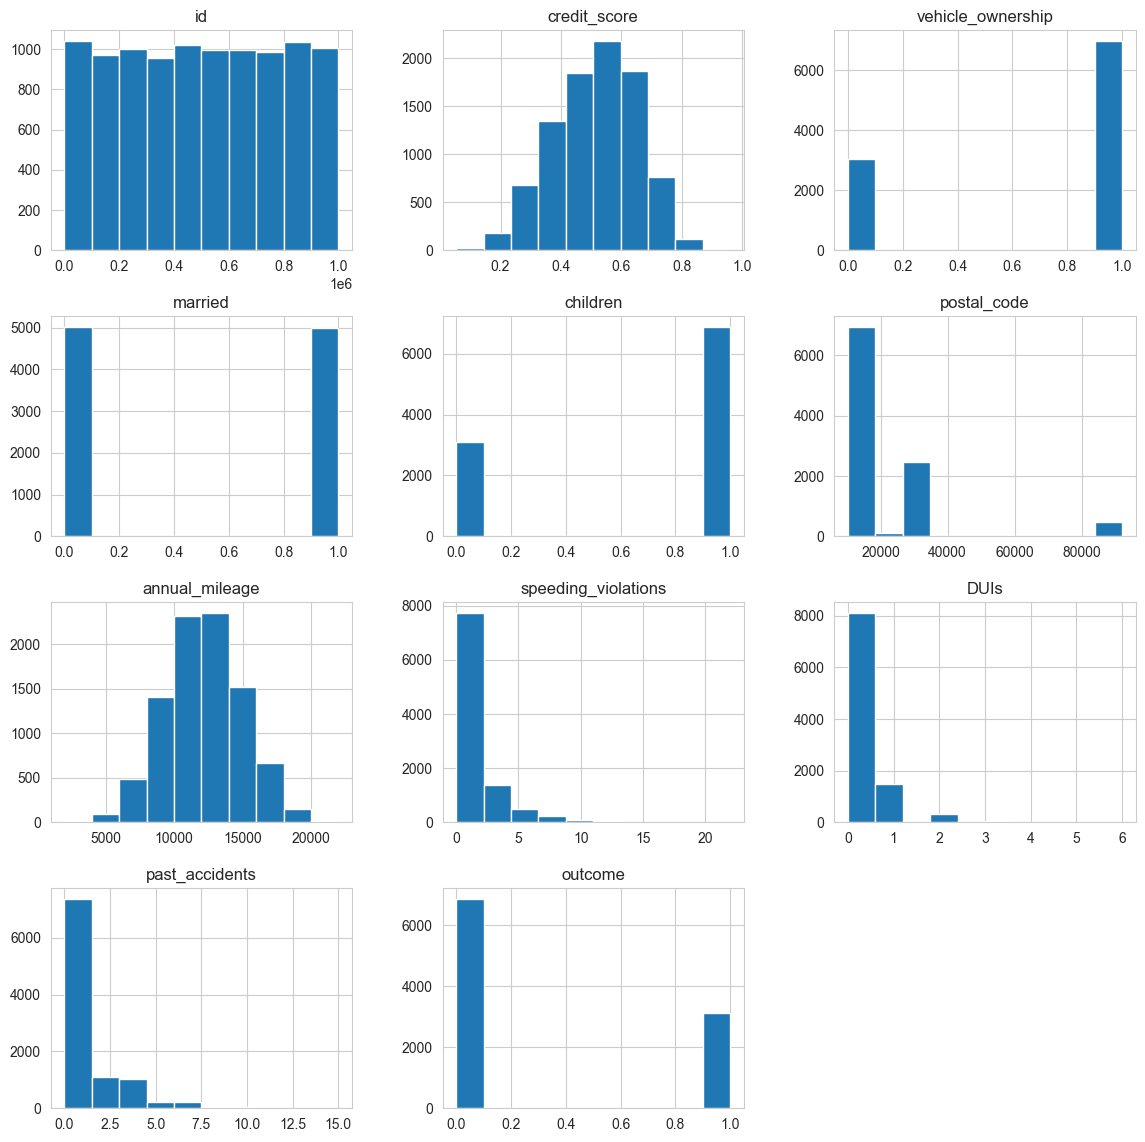

In [11]:
#построим гистограммы распределений
sns.set_style('whitegrid')
numbers = pd.Series(data.columns)
data[numbers].hist(figsize=(14,14))
plt.show()

Рассмотрим связь между признаками и целевой переменной OUTCOME

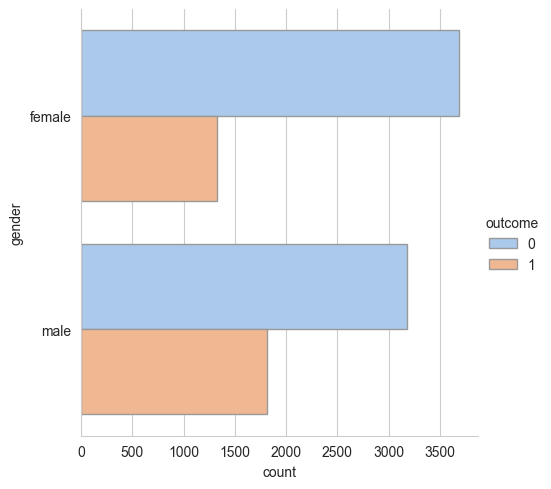

In [12]:
sns.catplot(y="gender", hue="outcome", kind="count", palette="pastel", edgecolor=".6", data=data)

Женщины реже обращаются за страховкой


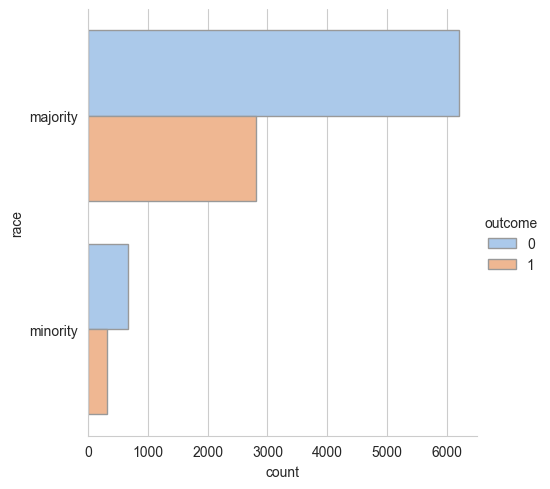

In [13]:
sns.catplot(y="race", hue="outcome", kind="count", palette="pastel", edgecolor=".6", data=data)

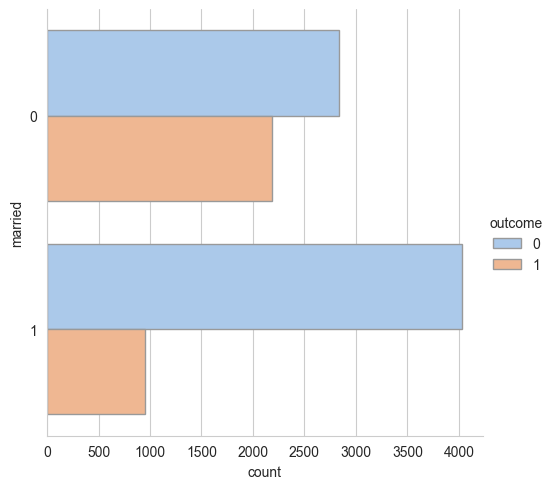

In [14]:
sns.catplot(y="married", hue="outcome", kind="count", palette="pastel", edgecolor=".6", data=data)

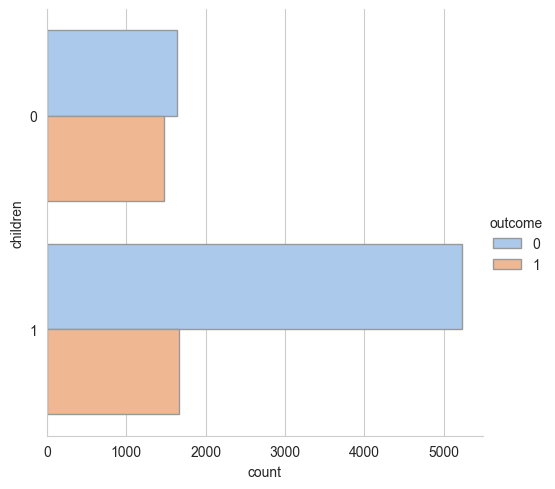

In [15]:
sns.catplot(y="children", hue="outcome", kind="count", palette="pastel", edgecolor=".6", data=data)

Клиенты, у которых есть семья, реже обращаются за страховкой, к тому же у них ниже пробег авто

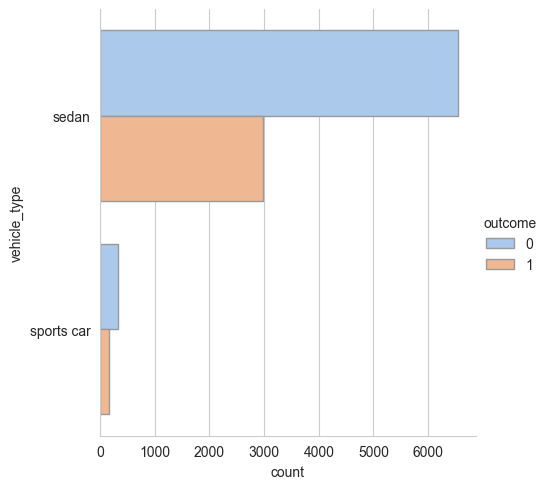

In [16]:
sns.catplot(y="vehicle_type", hue="outcome", kind="count", palette="pastel", edgecolor=".6", data=data)

Здесь также нет зависимости от типа машины, аналогично с race

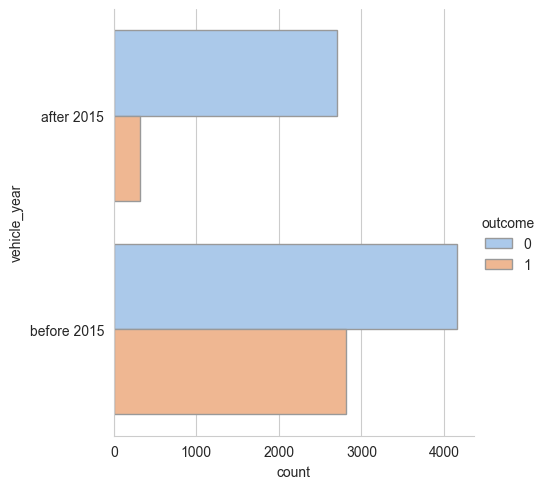

In [17]:
sns.catplot(y="vehicle_year", hue="outcome", kind="count", palette="pastel", edgecolor=".6", data=data)

Заметим, что новые машины меньше попадают в аварии

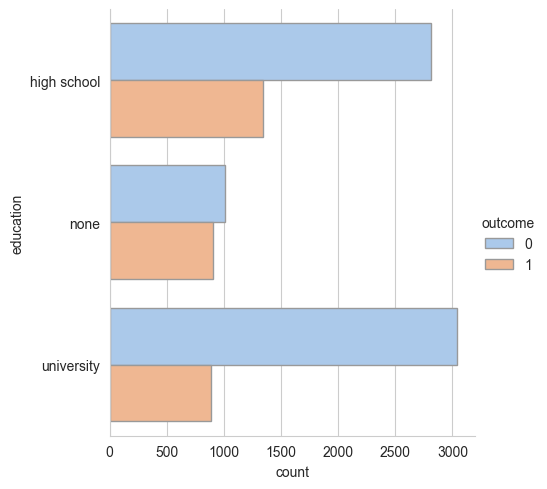

In [18]:
sns.catplot(y="education", hue="outcome", kind="count", palette="pastel", edgecolor=".6", data=data)

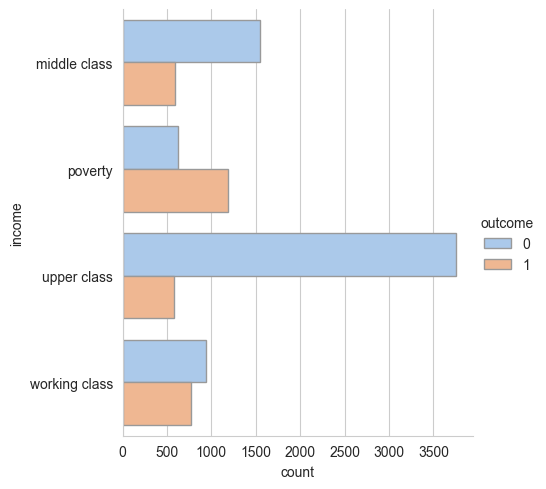

In [19]:
sns.catplot(y="income", hue="outcome", kind="count", palette="pastel", edgecolor=".6", data=data)

Наличие образования и с повышением уровня жизни растет вероятность того, что клиент не будет обращаться за страховкой, так как меньше будет попадать в опасные ситуации на дороге(или провоцировать их)

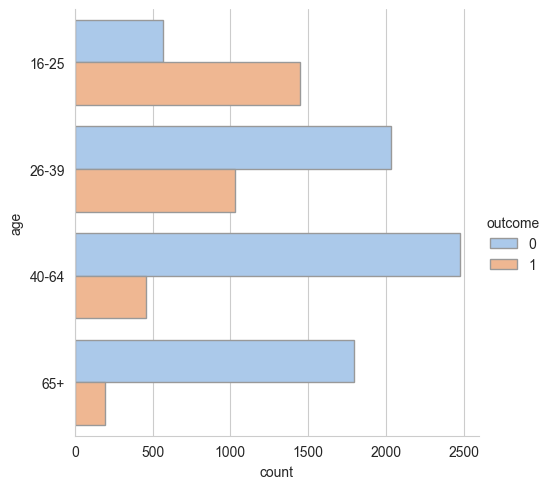

In [20]:
sns.catplot(y="age", hue="outcome", kind="count", palette="pastel", edgecolor=".6", data=data)

С возрастом клиенты водят аккуратнее 

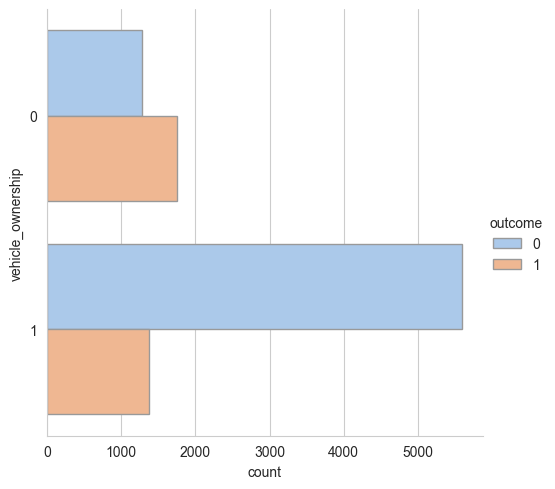

In [21]:
sns.catplot(y="vehicle_ownership", hue="outcome", kind="count", palette="pastel", edgecolor=".6", data=data)

Можно заметить, что если клиент водит не свою машину, то вероятнее всего он воспользуется страховкой

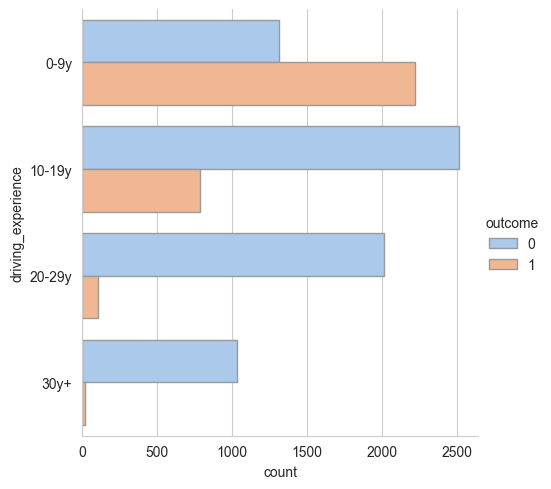

In [22]:
sns.catplot(y="driving_experience", hue="outcome", kind="count", palette="pastel", edgecolor=".6", data=data)

Чем больше стаж клиента, тем аккуратнее он водит машину

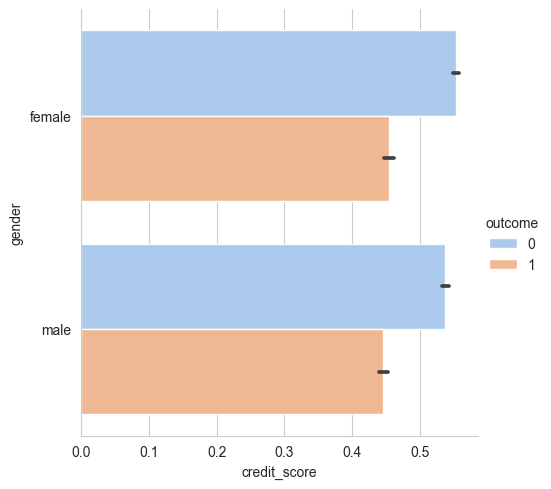

In [23]:
sns.catplot(x="credit_score" ,y="gender", hue="outcome", kind="bar", palette="pastel", data=data)

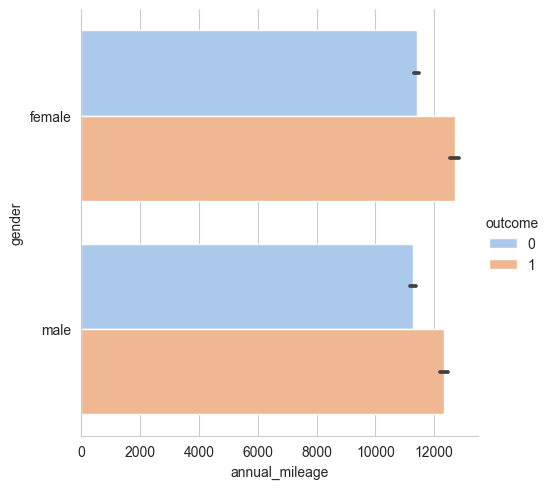

In [24]:
sns.catplot(x="annual_mileage" ,y="gender", hue="outcome", kind="bar", palette="pastel", data=data)

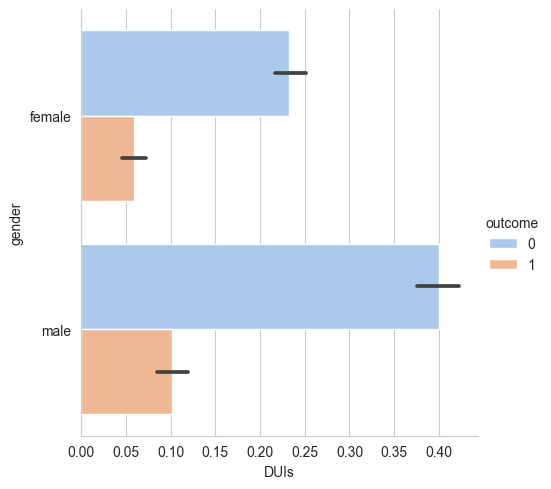

In [25]:
sns.catplot(x="DUIs" ,y="gender", hue="outcome", kind="bar", palette="pastel", data=data)

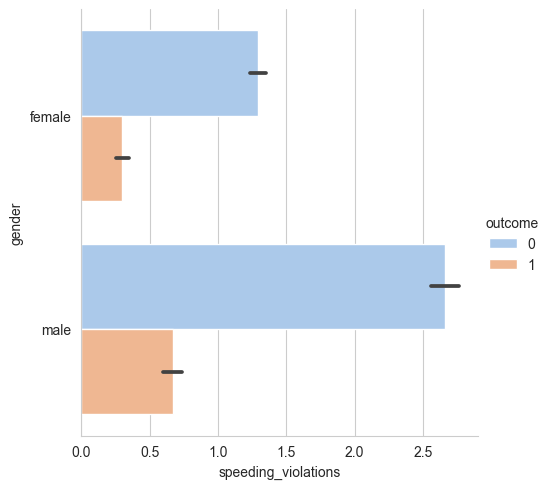

In [26]:
sns.catplot(x="speeding_violations" ,y="gender", hue="outcome", kind="bar", palette="pastel", data=data)

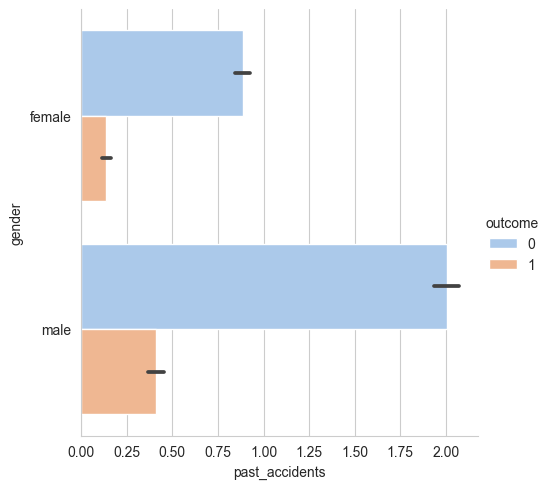

In [27]:
sns.catplot(x="past_accidents" ,y="gender", hue="outcome", kind="bar", palette="pastel", data=data)

Предыдущие графики говорят о том, что пол почти не влияет на вероятность обращения за страховкой

Можно удалить столбцы ID,POSTAL_CODE и RACE, так как они влияют только на уникальность каждого клиента. Затем удалим получившиеся дубликаты.

In [28]:
data = data.drop(columns='postal_code')
data  = data.drop(columns='race')
data  = data.drop(columns='id')
data  = data.drop(columns='vehicle_type')
print('Первоначальное кол-во данных:', data.shape[0])
data = data.drop_duplicates()
print('Кол-во данных после удаления дубликатов:', data.shape[0])

Первоначальное кол-во данных: 10000
Кол-во данных после удаления дубликатов: 9975


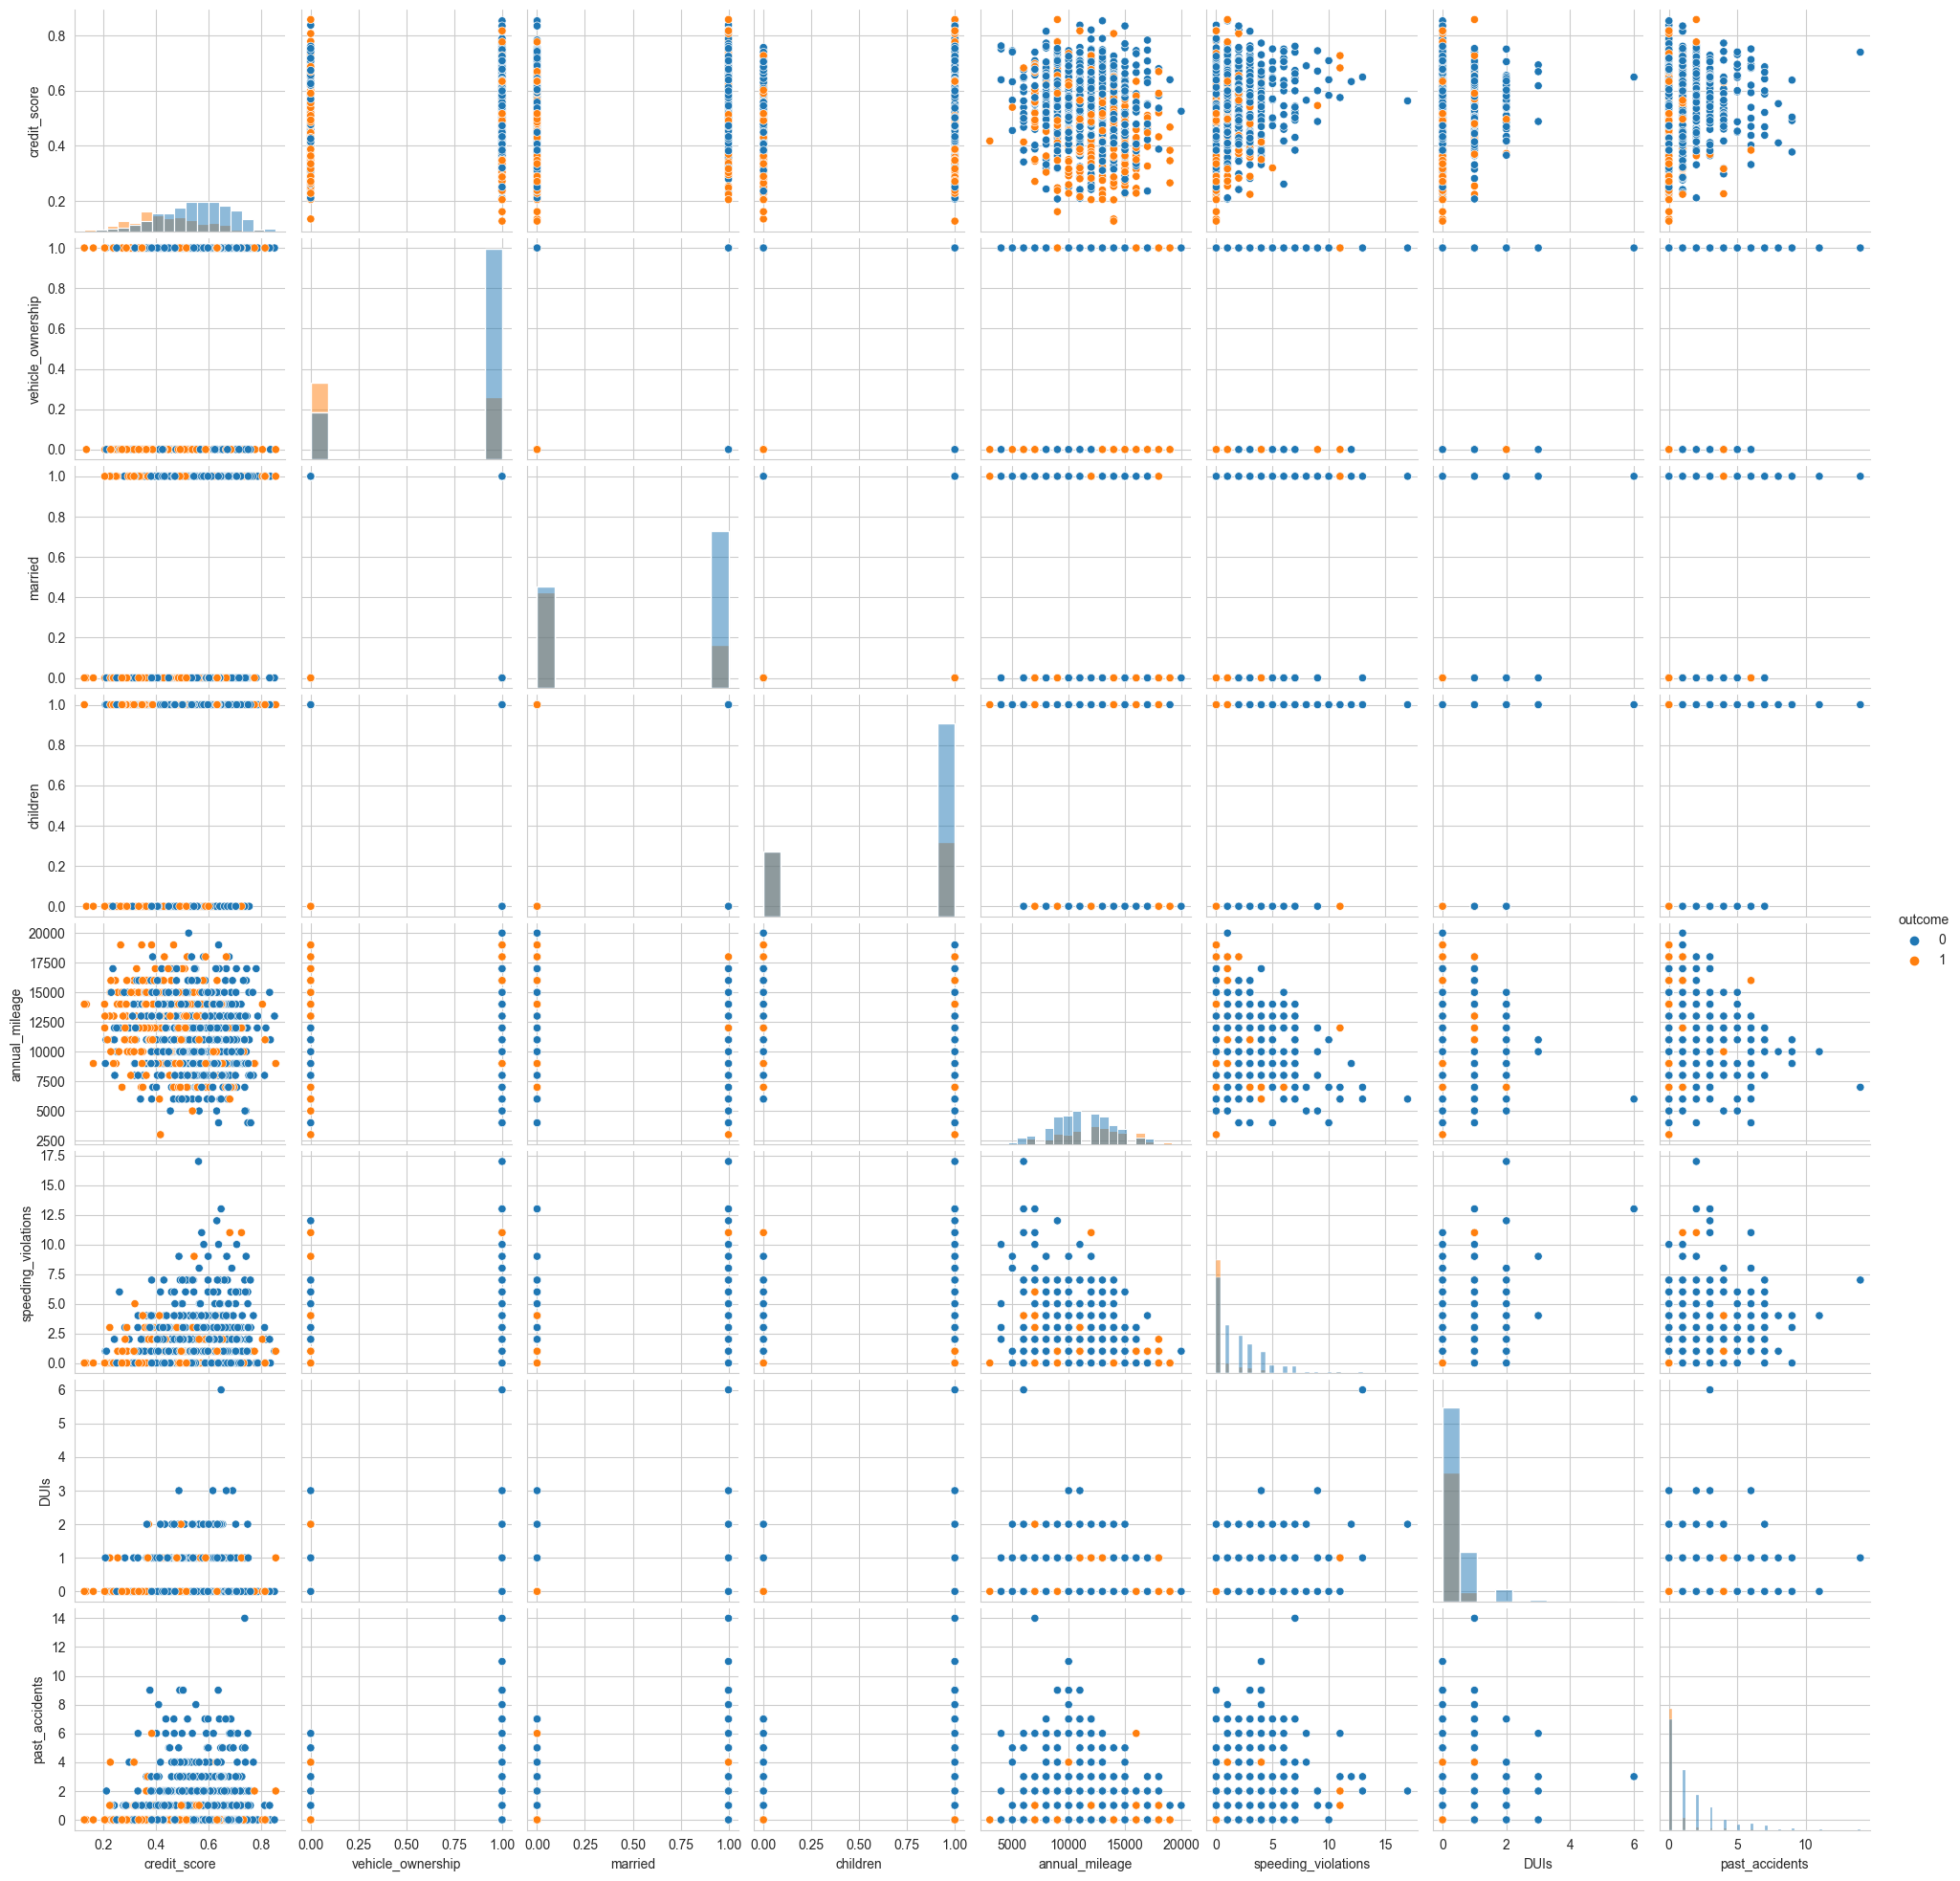

In [29]:
#диаграмма рассеивания относительно признака OUTCOME
sns.pairplot(data.iloc[np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)], hue='outcome', diag_kind='hist')

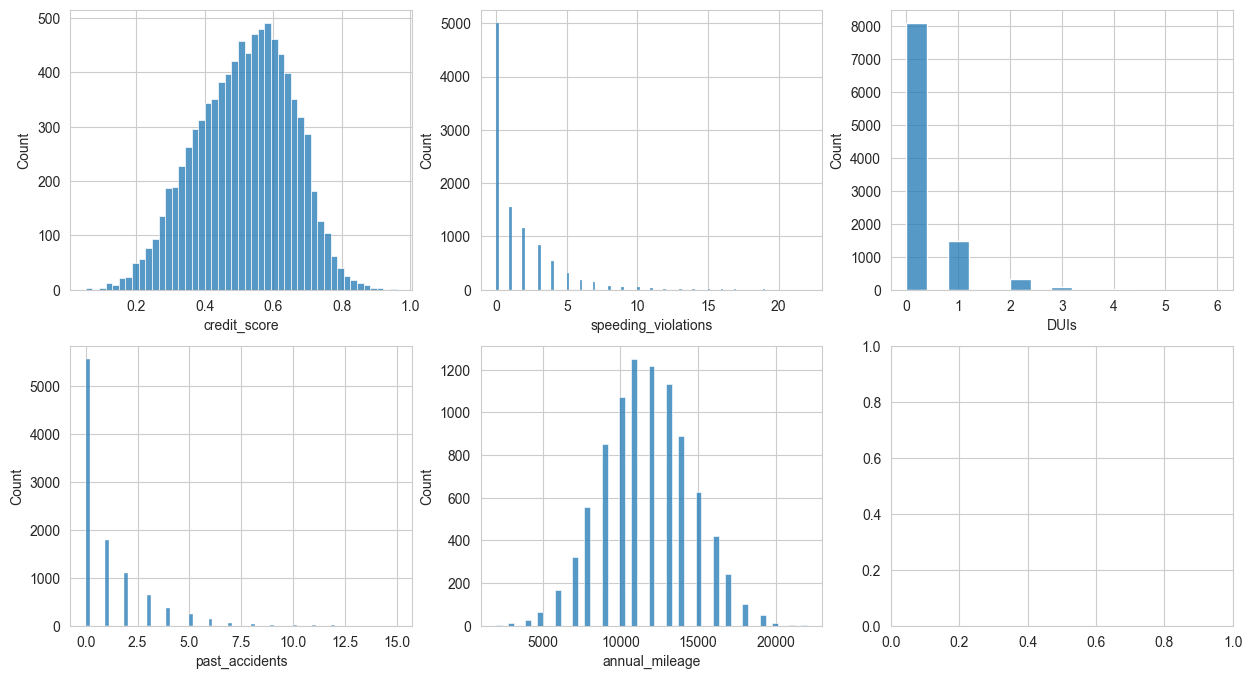

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
sns.histplot(data=data, x='credit_score', ax=axes[0,0]);
sns.histplot(data=data, x='speeding_violations', ax=axes[0,1]);
sns.histplot(data=data, x='DUIs', ax=axes[0,2]);
sns.histplot(data=data, x='past_accidents', ax=axes[1,0]);
sns.histplot(data=data, x='annual_mileage', ax=axes[1,1]);

## 3. Обработать пропущенные значения

In [37]:
data.isnull().sum()

age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           957
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
annual_mileage         952
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

Пропуски есть в колонках CREDIT_SCORE и ANNUAL_MILEAGE

In [38]:
data.isnull().sum()*100/(data.count()+data.isnull().sum())

age                    0.000000
gender                 0.000000
driving_experience     0.000000
education              0.000000
income                 0.000000
credit_score           9.593985
vehicle_ownership      0.000000
vehicle_year           0.000000
married                0.000000
children               0.000000
annual_mileage         9.543860
speeding_violations    0.000000
DUIs                   0.000000
past_accidents         0.000000
outcome                0.000000
dtype: float64

Заполним пропуски медианным значением

In [39]:
values = {"credit_score": data.credit_score.median(), "annual_mileage": data.annual_mileage.median()}
data = data.fillna(value=values)

print(f'Соотношение классов: {data.outcome[data.outcome == 1].count()}/{data.outcome[data.outcome == 0].count()} (данные несбалансированы)')


Соотношение классов: 3114/6861 (данные несбалансированы)


## 4. Обработать категориальные признаки

In [40]:
data.columns

Index(['age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'annual_mileage', 'speeding_violations', 'DUIs',
       'past_accidents', 'outcome'],
      dtype='object')

In [41]:
data = pd.get_dummies(data, columns = ['age', 'gender', 'driving_experience', 'education', 'income', 'vehicle_year'], drop_first=True)

In [42]:
data.head()

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,DUIs,past_accidents,outcome,age_26-39,...,gender_male,driving_experience_10-19y,driving_experience_20-29y,driving_experience_30y+,education_none,education_university,income_poverty,income_upper class,income_working class,vehicle_year_before 2015
0,0.629027,1,0,1,12000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.357757,0,0,0,16000.0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
2,0.493146,1,0,0,11000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0.206013,1,0,1,11000.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
4,0.388366,1,0,0,12000.0,2,0,1,1,1,...,1,1,0,0,1,0,0,0,1,1


## 5.Провести нормализацию 

In [43]:
#нормализуем данные по годовому пробегу

from sklearn.preprocessing import MinMaxScaler

minmxscaler= MinMaxScaler()
data['annual_mileage']  = minmxscaler.fit_transform(np.array(data['annual_mileage']).reshape(-1,1))
data

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,DUIs,past_accidents,outcome,age_26-39,...,gender_male,driving_experience_10-19y,driving_experience_20-29y,driving_experience_30y+,education_none,education_university,income_poverty,income_upper class,income_working class,vehicle_year_before 2015
0,0.629027,1,0,1,0.50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.357757,0,0,0,0.70,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
2,0.493146,1,0,0,0.45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0.206013,1,0,1,0.45,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
4,0.388366,1,0,0,0.50,2,0,1,1,1,...,1,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.582787,1,0,0,0.70,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,1
9996,0.522231,1,0,1,0.50,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
9997,0.470940,1,0,1,0.60,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
9998,0.364185,0,0,1,0.55,2,0,1,1,1,...,0,1,0,0,0,0,1,0,0,1


## 6.Разбить данные на обучающую и тестовую выборки

In [59]:
from sklearn.model_selection import train_test_split


y = data['outcome']
x = data.drop(['outcome'], axis=1)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3, random_state=42)

## 7.Запустить классификатор ближайших соседей или другой метод

In [92]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore") 

from sklearn.metrics import accuracy_score,confusion_matrix 

neighbours = [1,2,3,4,5,7,10,15,20,25,30]
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)
y_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)

print(np.mean(y_train != y_train_predict), np.mean(y_test != y_test_predict))
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)*100}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)*100}')
print("Confusion matrix")
cm_knn = confusion_matrix(y_test, y_test_predict) # создание confusion matrix
print(cm_knn)

0.0007161271841879118 0.23053792181757435
Accuracy Score train : 99.92838728158121
Accuracy Score test : 76.94620781824256
Confusion matrix
[[1760  346]
 [ 344  543]]


## 8.Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра. Сделать выводы

In [88]:
errs_train = []
errs_test = []

for i in neighbours:    
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    y_train_predict = model.predict(x_train)
    y_test_predict  = model.predict(x_test)
    errs_train.append(np.mean(y_train != y_train_predict))
    errs_test.append(np.mean(y_test != y_test_predict))
    
mat = pd.DataFrame([errs_train, errs_test], columns = neighbours,index=["errs_train", "errs_test"])
mat  

,1,2,3,4,5,7,10,15,20,25,30
errs_train,0.000716,0.116156,0.114437,0.138213,0.136064,0.147522,0.159983,0.166714,0.168147,0.169436,0.173732
errs_test,0.230538,0.206482,0.200468,0.190444,0.188774,0.191113,0.182092,0.180087,0.172736,0.177080,0.178750


In [93]:
model = KNeighborsClassifier(n_neighbors=25)
model.fit(x_train, y_train)
y_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)

print(np.mean(y_train != y_train_predict), np.mean(y_test != y_test_predict))
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)*100}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)*100}')
print("Confusion matrix")
cm_knn = confusion_matrix(y_test, y_test_predict) # создание confusion matrix
print(cm_knn)

0.16943569177885992 0.17707985299031073
Accuracy Score train : 83.05643082211401
Accuracy Score test : 82.29201470096893
Confusion matrix
[[1862  244]
 [ 286  601]]


In [95]:
model = KNeighborsClassifier(n_neighbors=35)
model.fit(x_train, y_train)
y_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)

print(np.mean(y_train != y_train_predict), np.mean(y_test != y_test_predict))
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)*100}')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)*100}')
print("Confusion matrix")
cm_knn = confusion_matrix(y_test, y_test_predict) # создание confusion matrix
print(cm_knn)

0.17258665138928675 0.17774807885065153
Accuracy Score train : 82.74133486107132
Accuracy Score test : 82.22519211493486
Confusion matrix
[[1863  243]
 [ 289  598]]


Метод протестирован с различными значениями параметрами k. Определение класса по ближайшему соседу при k=1 показазало точность классификации ~99% на обучающей выборке и ~77% на тестовой выборке, с увеличением k до 25 получим оптимальное значение параметра и точность классификации ~83% на обучающей выборке и ~82.2% на тестовой выборке